In [5]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [6]:
# read dataset
#filepath = "data-penumpang-bus-transjakarta-desember-2019.csv"
filepath = 'https://data.jakarta.go.id/dataset/50b36c4b-0aed-42a5-82e4-c3510475716a/resource/4c3be51b-6ae9-44cc-9b42-616b4c982614/download/Data-Penumpang-Bus-Transjakarta-Desember-2019.csv'
df = pd.read_csv(filepath)
df

,jenis,kode_trayek,trayek,jumlah_penumpang
0,BRT,1,KORIDOR 1 (BLOK M - KOTA),"2,686,458"
1,BRT,2,KORIDOR 2 (PULOGADUNG 1 - HARMONI),"936,927"
2,BRT,3,KORIDOR 3 (KALIDERES - PASAR BARU),"1,127,029"
3,BRT,4,KORIDOR 4 (PULOGADUNG 2 - DUKUH ATAS 2),"784,864"
4,BRT,5,KORIDOR 5 (KAMPUNG MELAYU - ANCOL),"1,161,894"
...,...,...,...,...
232,LAMPIRAN RINCIAN GRATIS GATE NON BRT,B11,HALTE MM BARAT,"1,013"
233,LAMPIRAN RINCIAN GRATIS GATE NON BRT,B12,HALTE SUMARECON BEKASI,535
234,LAMPIRAN RINCIAN GRATIS GATE NON BRT,B21,HALTE BULAK KAPAL,"1,071"
235,LAMPIRAN RINCIAN GRATIS GATE NON BRT,B22,HALTE BTC,399


In [7]:
jenis_unik = list(df['jenis'].unique())
print(f"Jenis unik: {jenis_unik}")
total_penumpang = []
for jenis in jenis_unik:
    jumlah_penumpang = df[df['jenis']==jenis]['jumlah_penumpang'].str.replace(",", "").astype(int)
    total_penumpang.append(jumlah_penumpang.sum())
print(f"Total penumpang: {total_penumpang}")

max_penumpang = np.asarray(jumlah_penumpang).max()
max_penumpang_idx = np.asarray(jumlah_penumpang).max()


Jenis unik: ['BRT', 'ANGKUTAN UMUM INTEGRASI', 'TRANSJABODETABEK', ' ANGKUTAN EKSEKUTIF ROYAL TRANS ', ' ANGKUTAN UMUM LAINNYA ', ' ANGKUTAN INTEGRASI BUS KECIL ', 'ANGKUTAN WISATA', 'ANGKUTAN UMUM INTEGRASI RUSUN', 'LAMPIRAN LAYANAN GRATIS BRT', 'LAMPIRAN RINCIAN GRATIS GATE NON BRT']
Total penumpang: [13939981, 3303762, 1570412, 130609, 694021, 6211138, 288109, 319757, 560203, 3940]


In [8]:
tulis_jenis = []
for i, jenis in enumerate(jenis_unik):
    tulis_jenis.append(f"{str(i+1)}. {jenis}\n")
tulis_jenis = ' '.join(map(str, tulis_jenis))
tulis_jenis

'1. BRT\n 2. ANGKUTAN UMUM INTEGRASI\n 3. TRANSJABODETABEK\n 4.  ANGKUTAN EKSEKUTIF ROYAL TRANS \n 5.  ANGKUTAN UMUM LAINNYA \n 6.  ANGKUTAN INTEGRASI BUS KECIL \n 7. ANGKUTAN WISATA\n 8. ANGKUTAN UMUM INTEGRASI RUSUN\n 9. LAMPIRAN LAYANAN GRATIS BRT\n 10. LAMPIRAN RINCIAN GRATIS GATE NON BRT\n'

In [9]:
total_trayek = []
for jenis in jenis_unik:
    jumlah_trayek = df[df['jenis']==jenis].shape[0]
    total_trayek.append(jumlah_trayek)
print(f"Total trayek: {total_trayek}")

Total trayek: [13, 63, 14, 13, 18, 69, 7, 21, 14, 5]


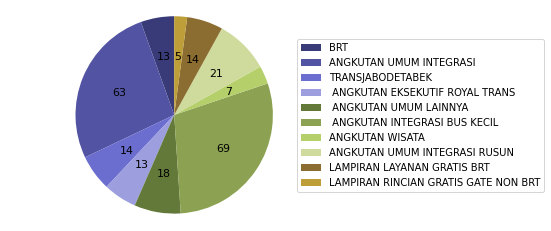

In [13]:
def label_function(val):
    return f'{val / 100 * sum(total_trayek):.0f}'

cmap_name = 'tab20b'
cmap = cm.get_cmap(cmap_name)
colors = cmap.colors[:len(jenis_unik)]

fig, ax = plt.subplots()
patches, labels, texts = ax.pie(total_trayek, autopct=label_function, startangle=90, colors=colors, textprops={'fontsize': 11})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.legend(patches, jenis_unik, loc="center left", bbox_to_anchor=(0.85, 0.5))
plt.show()

C:\Users\Radya Evandhika\AppData\Local\Temp/ipykernel_21196/2933274938.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(jenis_unik, rotation=0)


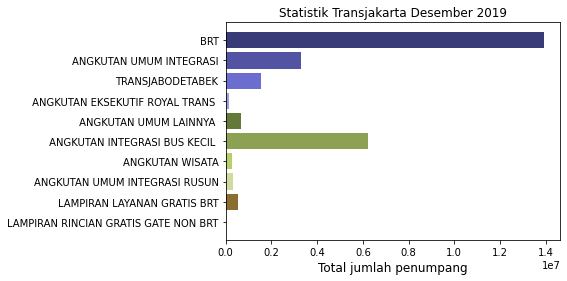

In [16]:
fig, ax = plt.subplots()
ax.barh(jenis_unik, total_penumpang, color=colors)
ax.set_yticklabels(jenis_unik, rotation=0)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Total jumlah penumpang", fontsize=12)
ax.set_title("Statistik Transjakarta Desember 2019")
plt.show()

In [17]:
list_bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
list_url = {'Januari': 'https://data.jakarta.go.id/dataset/50b36c4b-0aed-42a5-82e4-c3510475716a/resource/1a3bcf20-1ed0-42c9-baca-71cdabbe7fdc/download/Data-Penumpang-Bus-Transjakarta-Januari-2019.csv',
            'Februari': 'https://data.jakarta.go.id/dataset/50b36c4b-0aed-42a5-82e4-c3510475716a/resource/849e203a-ca5d-47d6-9024-1e753ca405ad/download/Data-Penumpang-Bus-Transjakarta-Februari-2019.csv', 
            'Maret': 'https://data.jakarta.go.id/dataset/50b36c4b-0aed-42a5-82e4-c3510475716a/resource/c7cea037-4306-4d3c-aabd-382798bf88ff/download/Data-Penumpang-Bus-Transjakarta-Maret-2019.csv', 
            'April': 'https://data.jakarta.go.id/dataset/50b36c4b-0aed-42a5-82e4-c3510475716a/resource/204a8676-afe3-4355-91cf-21ac866605eb/download/Data-Penumpang-Bus-Transjakarta-April-2019.csv', 
            'Mei': 'https://data.jakarta.go.id/dataset/50b36c4b-0aed-42a5-82e4-c3510475716a/resource/178a44a4-ad21-41c0-860b-67b5e1dd0175/download/Data-Penumpang-Bus-Transjakarta-Mei-2019.csv', 
            'Juni': 'https://data.jakarta.go.id/dataset/50b36c4b-0aed-42a5-82e4-c3510475716a/resource/fc49004a-2eaf-43c2-ab7d-b316ca0a6e38/download/Data-Penumpang-Bus-Transjakarta-Juni-2019.csv', 
            'Juli': 'https://data.jakarta.go.id/dataset/50b36c4b-0aed-42a5-82e4-c3510475716a/resource/ee7a387c-f0e5-4564-a17f-5e50e1137441/download/Data-Penumpang-Bus-Transjakarta-Juli-2019.csv', 
            'Agustus': 'https://data.jakarta.go.id/dataset/50b36c4b-0aed-42a5-82e4-c3510475716a/resource/d950bb97-7a49-42ff-9d22-438374404b82/download/Data-Penumpang-Bus-Transjakarta-Agustus-2019.csv', 
            'September': 'https://data.jakarta.go.id/dataset/50b36c4b-0aed-42a5-82e4-c3510475716a/resource/04e2b099-2d2c-47d5-bddd-3b0d092fbdae/download/Data-Penumpang-Bus-Transjakarta-September-2019.csv', 
            'Oktober': 'https://data.jakarta.go.id/dataset/50b36c4b-0aed-42a5-82e4-c3510475716a/resource/b37e5a6f-9b98-443b-bb5f-bdba288cf7e3/download/Data-Penumpang-Bus-Transjakarta-Oktober-2019.csv', 
            'November': 'https://data.jakarta.go.id/dataset/50b36c4b-0aed-42a5-82e4-c3510475716a/resource/14520801-0674-4334-89bc-a1f1a94257b7/download/Data-Penumpang-Bus-Transjakarta-November-2019.csv', 
            'Desember': 'https://data.jakarta.go.id/dataset/50b36c4b-0aed-42a5-82e4-c3510475716a/resource/4c3be51b-6ae9-44cc-9b42-616b4c982614/download/Data-Penumpang-Bus-Transjakarta-Desember-2019.csv'
           }

total_perbulan = []
for bulan in list_bulan:
    df = pd.read_csv(list_url[bulan])
    df['jumlah_penumpang'] = df['jumlah_penumpang'].str.replace(",", "", regex=True)
    df['jumlah_penumpang'] = df['jumlah_penumpang'].str.replace(".", "", regex=True)
    df['jumlah_penumpang'] = pd.to_numeric(df['jumlah_penumpang'], errors='coerce')
    #jumlah_perbulan = df['jumlah_penumpang'].astype(int).sum()
    jumlah_perbulan = df['jumlah_penumpang'].sum()
    #print(f"Bulan {bulan}, total penumpang: {jumlah_perbulan}")
    total_perbulan.append(jumlah_perbulan)
print(total_perbulan)

[17548381, 16603886, 18995253, 18453505, 18122062, 17982736, 22494430, 22954103, 23826204, 23871176.0, 25036753, 27021932]


C:\Users\Radya Evandhika\AppData\Local\Temp/ipykernel_21196/4131607235.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_bulan, rotation=90)


Text(0, 0.5, 'Total jumlah penumpang')

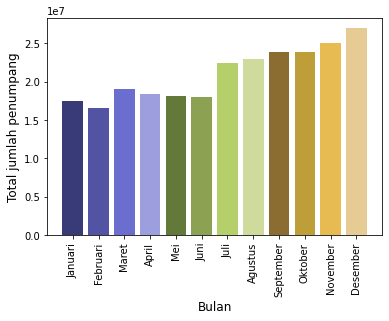

In [19]:
colors = cmap.colors[:len(list_bulan)]
fig, ax = plt.subplots()
ax.bar(list_bulan, total_perbulan, color=colors)
ax.set_xticklabels(list_bulan, rotation=90)
ax.set_xlabel("Bulan", fontsize=12)
ax.set_ylabel("Total jumlah penumpang", fontsize=12)